In [1]:
# Importing required libraries.

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Uploading the data set NYC_RIR
rir = pd.read_csv('rir.csv')

In [3]:
# Head look of the data 
rir.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [4]:
# Checking the names of the columns
rir.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [5]:
# Renaming columns
rir = rir.rename(columns={"CUISINE DESCRIPTION": "CUISINE","INSPECTION DATE": "INSPECTION_DATE", "VIOLATION CODE": "VIOLATION_CODE", "VIOLATION DESCRIPTION": "VIOLATION_DESCRIPTION", "CRITICAL FLAG":"CRITICAL_FLAG", "GRADE DATE":"GRADE_DATE", "RECORD DATE": "RECORD_DATE", "INSPECTION TYPE":"INSPECTION_TYPE", "Community Board":"Community_Board", "Council District":"Council_District", "Census Tract":"Census_Tract"})

In [6]:
rir

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION_DATE,ACTION,VIOLATION_CODE,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,GRADE_DATE,RECORD_DATE,INSPECTION_TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399913,41004284,CAFE CLASSICO,MANHATTAN,35,WEST 57 STREET,10019.0,2123555411,Jewish/Kosher,01/28/2016,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,19.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
399914,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,02/29/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,02/29/2016,08/28/2017,Cycle Inspection / Re-inspection
399915,50051468,Yong Kong Street,MANHATTAN,1000S,8TH AVE,10019.0,9176406083,Japanese,01/05/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,25.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
399916,41555297,RUBY FALLS NIGHTLIFE CAFE,STATEN ISLAND,45,PAGE AVENUE,10309.0,7189849888,American,09/19/2014,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,12.0,A,09/19/2014,08/28/2017,Cycle Inspection / Re-inspection


In [7]:
# Checking the data type
rir.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE                   object
INSPECTION_DATE           object
ACTION                    object
VIOLATION_CODE            object
VIOLATION_DESCRIPTION     object
CRITICAL_FLAG             object
SCORE                    float64
GRADE                     object
GRADE_DATE                object
RECORD_DATE               object
INSPECTION_TYPE           object
dtype: object

In [8]:
# Total number of rows and columns
rir.shape

(399918, 18)

In [9]:
# Rows containing duplicate data
duplicate_rows_rir = rir[rir.duplicated()]
print("number of duplicate rows: ", duplicate_rows_rir.shape)

number of duplicate rows:  (11, 18)


In [10]:
# Used to count the number of rows before removing the data
rir.count() 

CAMIS                    399918
DBA                      399559
BORO                     399918
BUILDING                 399809
STREET                   399909
ZIPCODE                  399909
PHONE                    399913
CUISINE                  399918
INSPECTION_DATE          399918
ACTION                   398783
VIOLATION_CODE           393414
VIOLATION_DESCRIPTION    392939
CRITICAL_FLAG            399918
SCORE                    376704
GRADE                    195413
GRADE_DATE               192820
RECORD_DATE              399918
INSPECTION_TYPE          398783
dtype: int64

In [11]:
# Dropping the duplicates 
rir = rir.drop_duplicates()
rir.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION_DATE,ACTION,VIOLATION_CODE,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,GRADE_DATE,RECORD_DATE,INSPECTION_TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [12]:
# Counting the number of rows after removing duplicates.
rir.count()

CAMIS                    399907
DBA                      399548
BORO                     399907
BUILDING                 399798
STREET                   399898
ZIPCODE                  399898
PHONE                    399902
CUISINE                  399907
INSPECTION_DATE          399907
ACTION                   398772
VIOLATION_CODE           393403
VIOLATION_DESCRIPTION    392933
CRITICAL_FLAG            399907
SCORE                    376700
GRADE                    195413
GRADE_DATE               192820
RECORD_DATE              399907
INSPECTION_TYPE          398772
dtype: int64

In [13]:
# Checking missing data in rir 
total = rir.isnull().sum().sort_values(ascending = False)
percent = (rir.isnull().sum()/rir.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GRADE_DATE,207087,51.783790
GRADE,204494,51.135389
SCORE,23207,5.803099
VIOLATION_DESCRIPTION,6974,1.743905
VIOLATION_CODE,6504,1.626378


In [14]:
# Describing the score
rir['SCORE'].describe()

count    376700.000000
mean         18.910138
std          12.959017
min          -2.000000
25%          11.000000
50%          15.000000
75%          24.000000
max         151.000000
Name: SCORE, dtype: float64

Text(0, 0.5, 'Total number of restaurants that has the score')

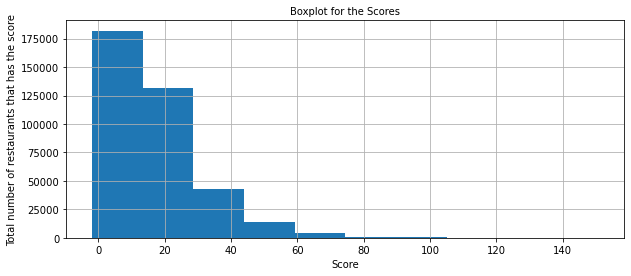

In [15]:
# Ploting a histogram
rir.SCORE.hist(figsize=(10,4))
plt.title("Boxplot for the Scores", fontsize = 10)
plt.xlabel('Score', fontsize = 10)
plt.ylabel('Total number of restaurants that has the score', fontsize = 10)

In [16]:
# Checking the grade column
rir.GRADE.value_counts()

A                 154194
B                  28166
C                   6992
Not Yet Graded      2598
Z                   2104
P                   1359
Name: GRADE, dtype: int64

Text(0.5, 1.0, 'Boxplot by Grade')

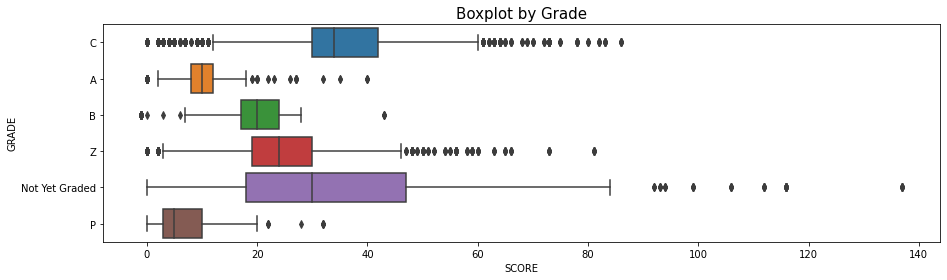

In [33]:
#Boxplotting the grades 
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(rir.SCORE.dropna(),rir.GRADE)
plt.title('Boxplot by Grade', fontsize = 15)

Text(0, 0.5, 'Total number of restaurants with respective grade')

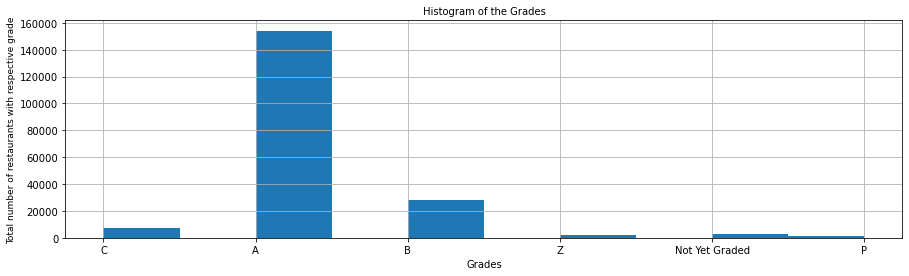

In [17]:
# Histogram of the Grades.
rir.GRADE.hist(figsize = (15, 4))
plt.title("Histogram of the Grades", fontsize=10)
plt.xlabel('Grades', fontsize = 10)
plt.ylabel('Total number of restaurants with respective grade', fontsize = 9)

In [18]:
# Checking the borough column
rir.BORO.value_counts()

MANHATTAN        159566
BROOKLYN          99595
QUEENS            92415
BRONX             34895
STATEN ISLAND     13427
Missing               9
Name: BORO, dtype: int64

Text(0, 0.5, 'Total number of inspections')

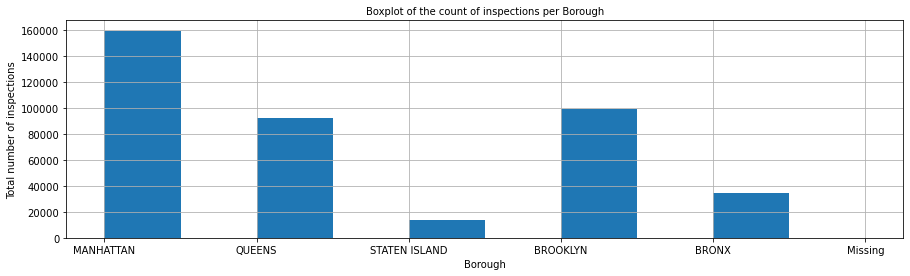

In [19]:
# Histogram of the numbers of boroughs.
rir.BORO.hist(figsize = (15, 4))
plt.title('Boxplot of the count of inspections per Borough', fontsize = 10)
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('Total number of inspections', fontsize = 10)

Text(0.5, 1.0, 'Boxplot by Borough')

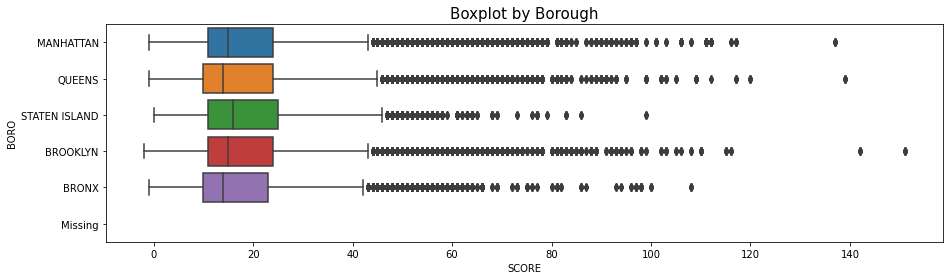

In [35]:
#boxplotting boroughs by score 
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(rir.SCORE.dropna(), rir.BORO)
plt.title('Boxplot by Borough', fontsize = 15)

In [20]:
# The restaurants under different boroughs with the highest and lowest number of restaurants 
# that have the highest and lowest score
rir1 = pd.crosstab(rir.SCORE, rir.BORO, margins = True)
rir1

# Manhattan     boro has highest number of restaurants that have lowest number of score
# Staten Island boro has the lowest number of restaurants that have lowest number of score
# Queens        boro has the highest number of restaurants that have highest number of score 
# Brooklyn, Manhattan and Staten Island boro has the lowest number of restaurants that have highest number of score 

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,All
SCORE,,,,,,
-2.0,0,3,0,0,0,3
-1.0,8,42,58,5,0,113
0.0,184,459,619,385,33,1680
2.0,468,1346,2091,1084,133,5122
3.0,225,496,815,493,54,2083
...,...,...,...,...,...,...
137.0,0,0,9,0,0,9
139.0,0,0,0,10,0,10
142.0,0,10,0,0,0,10


In [47]:
rir2 = pd.crosstab(rir.GRADE, rir.BORO, margins = True)
rir2

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,All
GRADE,,,,,,
A,13642,37354,61949,36014,5235,154194
B,2790,6881,10826,6739,930,28166
C,682,1694,2732,1684,200,6992
Not Yet Graded,225,771,856,633,113,2598
P,163,377,470,306,43,1359
Z,168,500,849,486,101,2104
All,17670,47577,77682,45862,6622,195413


In [59]:
cuisine = rir['CUISINE'].value_counts()
pd.set_option("max_columns", 2) #Showing only two columns
pd.set_option("max_rows", None)
cuisine

American                                                            90962
Chinese                                                             42321
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    19134
Pizza                                                               18754
Italian                                                             17732
CafÃ©/Coffee/Tea                                                    15566
Mexican                                                             15217
Japanese                                                            14491
Caribbean                                                           13021
Bakery                                                              11948
Spanish                                                             11695
Pizza/Italian                                                        8728
Asian                                                                6254
Delicatessen                          

Text(0.5, 1.0, 'Grade Distribution by Cuisine')

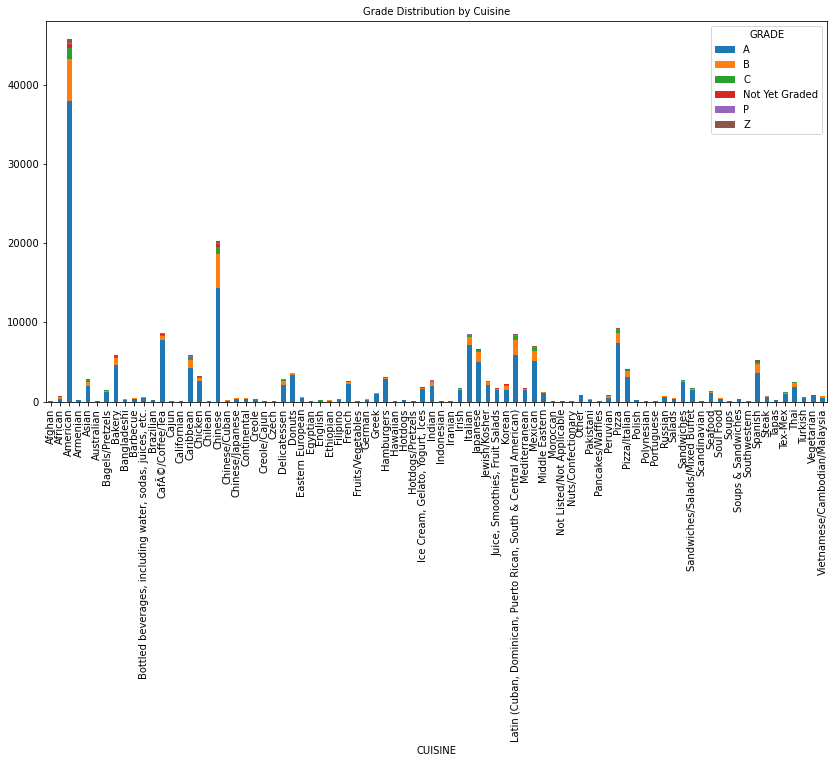

In [22]:
pd.crosstab(rir.CUISINE, rir.GRADE).plot(kind="bar", figsize=(14,7), stacked=True)
plt.title('Grade Distribution by Cuisine', fontsize = 10)

#American, chinese, pizza, cafe/coffee/tea have the highest 

In [37]:
# Checking the borough column
rir.CRITICAL_FLAG.value_counts()

Critical          220080
Not Critical      172853
Not Applicable      6974
Name: CRITICAL_FLAG, dtype: int64

Text(0.5, 0, 'Flag')

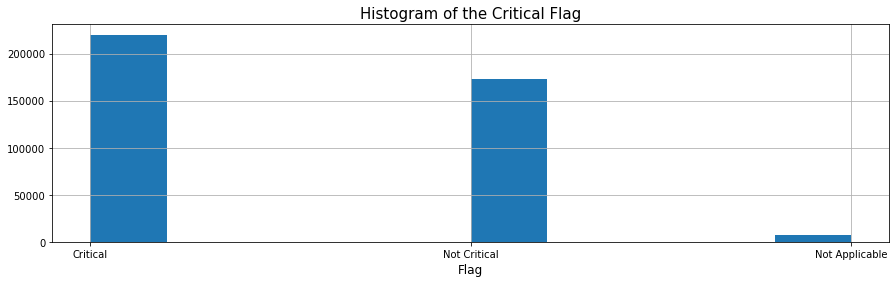

In [46]:
# Critical flag graph
rir['CRITICAL_FLAG'].hist(figsize=(15,4))
plt.title('Histogram of the Critical Flag', fontsize = 15)
plt.xlabel('Flag', fontsize = 12)

Text(0.5, 1.0, 'Critical Flag by Borough')

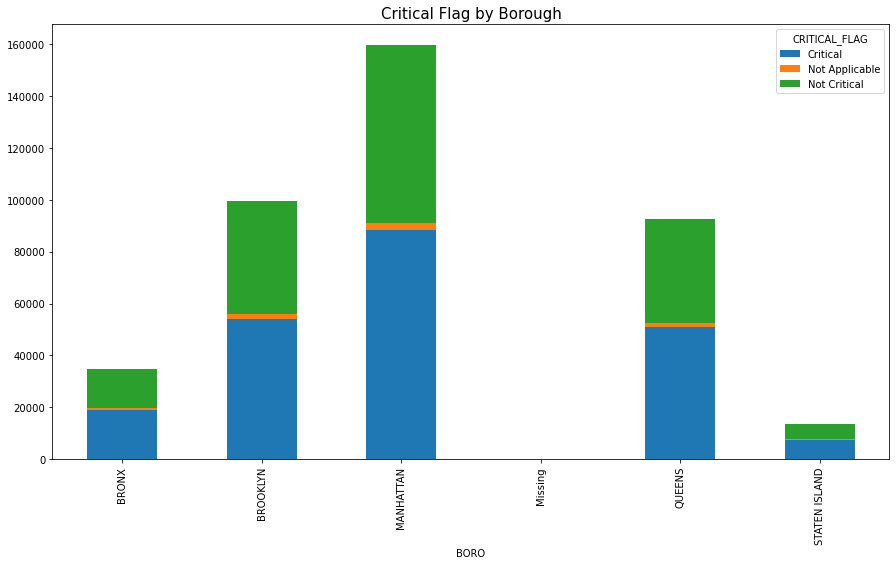

In [40]:
# Critical Flag by Borough
pd.crosstab(rir.BORO, rir['CRITICAL_FLAG']).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Critical Flag by Borough', fontsize = 15)


Text(0.5, 1.0, 'Critical Flag by Cuisine')

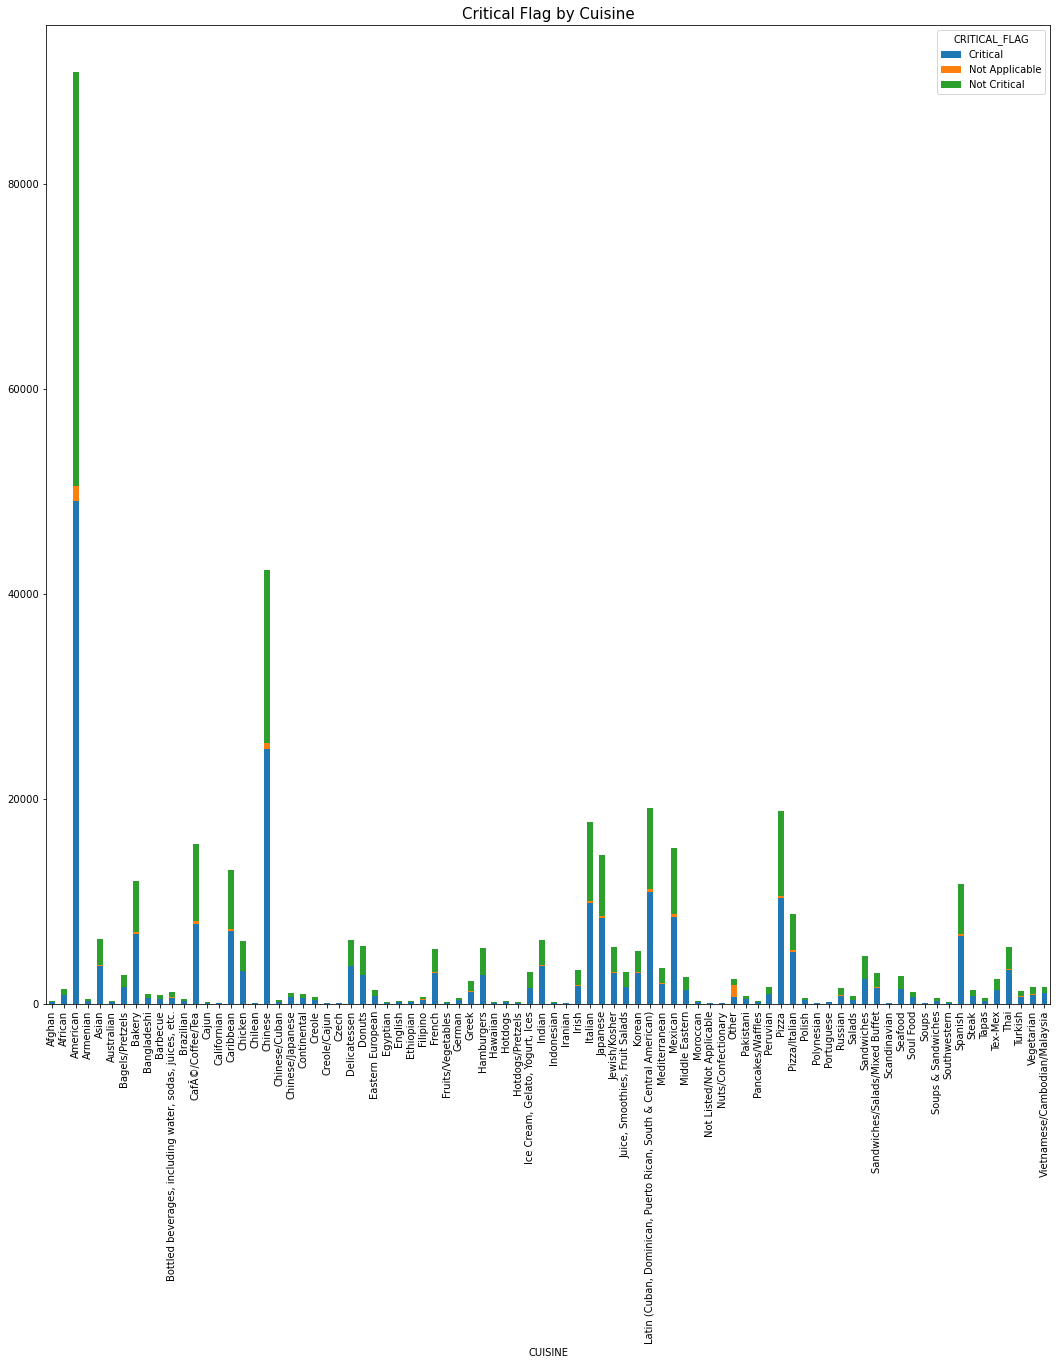

In [43]:
# Critical Flag by Cuisine
pd.crosstab(rir['CUISINE'], rir['CRITICAL_FLAG']).plot(kind="bar", figsize=(18,18), stacked=True)
plt.title('Critical Flag by Cuisine', fontsize = 15)

In [23]:

def preprocess_inputs(df):
    df = df.copy()
    
    # Drop CAMIS and DBA columns
    df = df.drop(['CAMIS', 'DBA'], axis=1)
    
    # Drop unnecessary (duplicate) column
    df = df.drop('VIOLATION_DESCRIPTION', axis=1)
    
    # Drop single-value column
    df = df.drop('RECORD_DATE', axis=1)
    
    # Drop columns with more than 25% missing values
    missing_value_columns = df.columns[df.isna().mean() >= 0.25]
    df = df.drop(missing_value_columns, axis=1)
    
    # Drop high-cardinality columns
    high_cardinality_columns = [
        'BUILDING',
        'STREET',
        'PHONE',
    ]
    df = df.drop(high_cardinality_columns, axis=1)
    
    # Convert ZIPCODE column into a string column
    df['ZIPCODE'] = df['ZIPCODE'].astype(str)
    
    # Drop rows with missing target values
    missing_target_rows = df[df['CRITICAL_FLAG'] == 'Not Applicable'].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)
    
    # Fill missing values
    df['SCORE'] = df['SCORE'].fillna(df['SCORE'].mean())
    
    # Extract date features
    df['INSPECTION_DATE'] = pd.to_datetime(df['INSPECTION_DATE'])
    df['INSPECTION_YEAR'] = df['INSPECTION_DATE'].apply(lambda x: x.year)
    df['INSPECTION_MONTH'] = df['INSPECTION_DATE'].apply(lambda x: x.month)
    df['INSPECTION_DAY'] = df['INSPECTION_DATE'].apply(lambda x: x.day)
    df = df.drop('INSPECTION_DATE', axis=1)
    
    # One-hot encode remaining categorical columns
    for column in df.select_dtypes('object').columns.drop('CRITICAL_FLAG'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    # Split df into X and y
    y = df['CRITICAL_FLAG']
    X = df.drop('CRITICAL_FLAG', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    df = df.reset_index()
    
    
    return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = preprocess_inputs(rir)

In [25]:
X_train

,SCORE,INSPECTION_YEAR,INSPECTION_MONTH,INSPECTION_DAY,BORO_BRONX,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,ZIPCODE_10001.0,...,INSPECTION_TYPE_Smoke-Free Air Act / Compliance Inspection,INSPECTION_TYPE_Smoke-Free Air Act / Initial Inspection,INSPECTION_TYPE_Smoke-Free Air Act / Limited Inspection,INSPECTION_TYPE_Smoke-Free Air Act / Re-inspection,INSPECTION_TYPE_Smoke-Free Air Act / Second Compliance Inspection,INSPECTION_TYPE_Trans Fat / Compliance Inspection,INSPECTION_TYPE_Trans Fat / Initial Inspection,INSPECTION_TYPE_Trans Fat / Limited Inspection,INSPECTION_TYPE_Trans Fat / Re-inspection,INSPECTION_TYPE_Trans Fat / Second Compliance Inspection
555,0.476191,-1.367544,0.203043,0.607727,-0.309548,-0.575563,1.228754,-0.548823,-0.187048,-0.135681,...,-0.009723,-0.099175,-0.001907,-0.063279,-0.00572,-0.016734,-0.079071,-0.001907,-0.046678,-0.006324
197060,1.031315,0.508282,0.507641,-1.580527,-0.309548,1.737428,-0.813832,-0.548823,-0.187048,-0.135681,...,-0.009723,-0.099175,-0.001907,-0.063279,-0.00572,-0.016734,-0.079071,-0.001907,-0.046678,-0.006324
89280,0.317585,0.508282,1.116839,0.492556,-0.309548,1.737428,-0.813832,-0.548823,-0.187048,-0.135681,...,-0.009723,-0.099175,-0.001907,-0.063279,-0.00572,-0.016734,-0.079071,-0.001907,-0.046678,-0.006324
104902,-0.237539,-1.367544,-1.624549,0.607727,-0.309548,-0.575563,1.228754,-0.548823,-0.187048,-0.135681,...,-0.009723,-0.099175,-0.001907,-0.063279,-0.00572,-0.016734,-0.079071,-0.001907,-0.046678,-0.006324
84996,-0.871966,0.508282,-0.710753,-1.004670,-0.309548,-0.575563,-0.813832,1.822081,-0.187048,-0.135681,...,-0.009723,-0.099175,-0.001907,-0.063279,-0.00572,-0.016734,-0.079071,-0.001907,-0.046678,-0.006324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,-0.000335,-0.429631,1.726036,-0.659157,-0.309548,1.737428,-0.813832,-0.548823,-0.187048,-0.135681,...,-0.009723,-0.099175,-0.001907,-0.063279,-0.00572,-0.016734,12.646890,-0.001907,-0.046678,-0.006324
371403,-0.871966,1.446194,0.203043,1.068412,-0.309548,1.737428,-0.813832,-0.548823,-0.187048,-0.135681,...,-0.009723,-0.099175,-0.001907,-0.063279,-0.00572,-0.016734,-0.079071,-0.001907,-0.046678,-0.006324
312201,1.507135,-0.429631,-0.710753,1.529097,-0.309548,-0.575563,1.228754,-0.548823,-0.187048,-0.135681,...,-0.009723,-0.099175,-0.001907,-0.063279,-0.00572,-0.016734,-0.079071,-0.001907,-0.046678,-0.006324
267336,-1.268483,1.446194,0.203043,0.607727,-0.309548,-0.575563,1.228754,-0.548823,-0.187048,-0.135681,...,-0.009723,-0.099175,-0.001907,-0.063279,-0.00572,-0.016734,-0.079071,-0.001907,-0.046678,-0.006324


In [26]:
y_train

555       Not Critical
197060    Not Critical
89280     Not Critical
104902        Critical
84996         Critical
              ...     
73349     Not Critical
371403    Not Critical
312201        Critical
267336    Not Critical
128037    Not Critical
Name: CRITICAL_FLAG, Length: 275053, dtype: object

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
acc = model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(acc * 100))

Test Accuracy: 100.00%


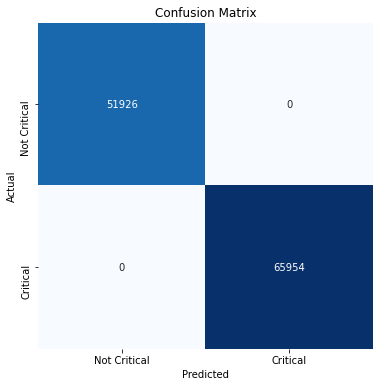

Classification Report:
----------------------
               precision    recall  f1-score   support

Not Critical       1.00      1.00      1.00     51926
    Critical       1.00      1.00      1.00     65954

    accuracy                           1.00    117880
   macro avg       1.00      1.00      1.00    117880
weighted avg       1.00      1.00      1.00    117880



In [29]:
# Confusion matrix and classification

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=['Not Critical', 'Critical'])
clr = classification_report(y_test, y_pred, labels=['Not Critical', 'Critical'])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['Not Critical', 'Critical'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Critical', 'Critical'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)